In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

## import then data preprocessing

In [48]:
data = pd.read_csv("heart.csv")
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [49]:
# encode categorical features
obj_list = data.select_dtypes(include='object').columns
obj_list

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for obj in obj_list:
    data[obj] = le.fit_transform(data[obj].astype(str))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


In [51]:
X = data.drop('HeartDisease', axis=1).values
y = data['HeartDisease'].values

In [52]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

## preparing dataset

In [53]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## modeling

In [55]:
# Scikit-Learn modules
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve

In [56]:
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

scores = {}

def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        scores[model_name] = model.score(X_test, y_test)
        
    return scores

scores_of_models = fit_score(models, X_train, X_test, y_train, y_test)

In [57]:
model_compare = pd.DataFrame(scores_of_models, index=['accuracy'])
model_compare.T

,accuracy
Logistic Regression,0.858696
KNN,0.847826
Random Forest,0.885870


## feature importance

In [58]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [59]:
clf.coef_

array([[ 0.13940167,  0.49672226, -0.56600312,  0.06455664, -0.49245177,
         0.40352478, -0.1737623 , -0.20065071,  0.62624317,  0.48344787,
        -1.00912276]])

In [60]:
feature_importance = dict(zip(data.columns, list(clf.coef_[0])))
feature_importance

{'Age': 0.13940166913158455,
 'Sex': 0.4967222593382874,
 'ChestPainType': -0.5660031198946205,
 'RestingBP': 0.06455664484261944,
 'Cholesterol': -0.4924517673533306,
 'FastingBS': 0.4035247836462651,
 'RestingECG': -0.17376229970486223,
 'MaxHR': -0.20065070798584,
 'ExerciseAngina': 0.6262431708956414,
 'Oldpeak': 0.4834478722131603,
 'ST_Slope': -1.009122758907497}

<AxesSubplot:title={'center':'Feature Importance'}>

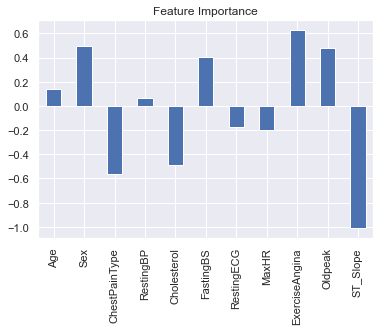

In [61]:
feature_df = pd.DataFrame(feature_importance, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False)

## metrics

In [62]:
clf = RandomForestClassifier()
cv_acc = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print(f"cross-val accuracy (mean): {np.mean(cv_acc)*100:.2f}%")

cross-val accuracy (mean): 85.61%


In [63]:
cv_rec = cross_val_score(clf, X_train, y_train, cv=5)
print(f"cross-val recall (mean): {np.mean(cv_rec)*100:.2f}%")

cross-val recall (mean): 86.37%


In [64]:
cv_pre = cross_val_score(clf, X_train, y_train, scoring='precision')
print(f"cross-val recall (mean): {np.mean(cv_pre)*100:.2f}%")

cross-val recall (mean): 86.31%


In [65]:
cv_f1 = cross_val_score(clf, X, y, scoring='f1')
print(f"cross-val f1 (mean): {np.mean(cv_f1)*100:.2f}%")

cross-val f1 (mean): 84.71%


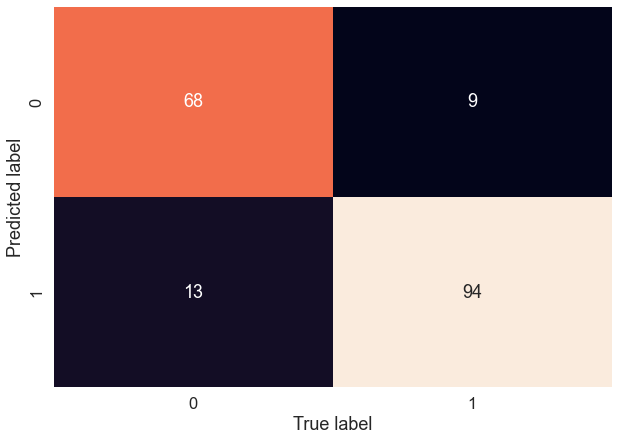

In [66]:
# Confusion matrix
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

clf = RandomForestClassifier(n_estimators=25, criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

def plot_conf_mat(y_test, y_pred):
  fig, ax = plt.subplots(figsize=(10,7))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cbar=False)
  plt.xlabel("True label")
  plt.ylabel("Predicted label")

plot_conf_mat(y_test, y_pred)

In [67]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        77
           1       0.90      0.89      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

